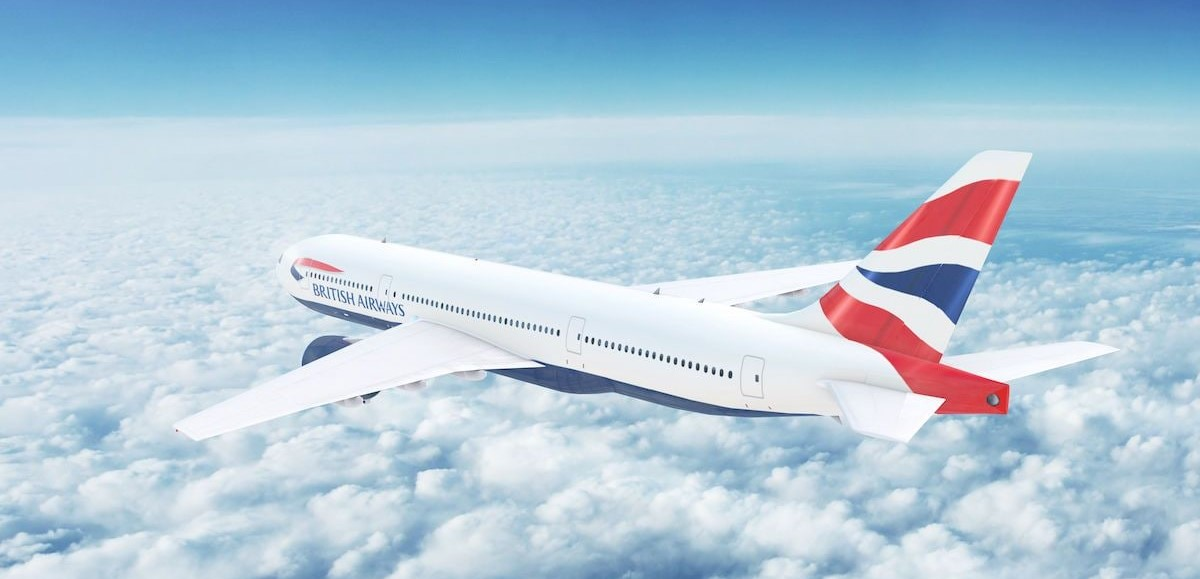

### <span style='color:#20345a'>Import libraries</span>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from colorama import Fore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

### <span style='color:#20345a'>Remove Warning</span>

In [ ]:
import warnings
warnings.simplefilter("ignore")

### <span style='color:#20345a'>Reading the file</span>

Airline : The name of the airline

Date_of_Journey : The date of the journey

Source : The source from which the service begins

Destination : The destination where the service ends

Route : The route taken by the flight to reach the destination

Dep_Time : The time when the journey starts from the source

Arrival_Time : Time of arrival at the destination

Duration : Total duration of the flight

Total_Stops : Total stops between the source and destination

Additional_Info : Additional information about the flight

Price : The price of the ticket

### <span style='color:#20345a'>Reading the file</span>

In [ ]:
df = pd.read_csv('Train set.csv')
df1 = pd.read_csv('Test set.csv')
df.head()
#df for the train dataset
#df1 for the test dataset

### <span style='color:#20345a'>Data Information</span>

In [ ]:
df.info()

In [ ]:
#Fore.LIGHTCYAN_EX for output color 
print(Fore.LIGHTCYAN_EX , df.shape)

In [ ]:
df.describe()

find duplicated

In [ ]:
df.duplicated().any()

In [ ]:
print(Fore.LIGHTCYAN_EX,'There are "{}" duplicate values in my data'.format(df.duplicated().sum()))

In [ ]:
df[df.duplicated(keep=False)].sort_values(['Airline', 'Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time']).head(15)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

In [ ]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df1.isna().sum()

In [ ]:
df[df['Total_Stops'].isna()]

In [ ]:
df1[df1['Total_Stops'].isna()]

In [ ]:
filt = (df['Airline'] == 'Air India') & (df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin') & (df['Duration'] == '23h 40m') & (df['Price'] == 7480) 
df[filt]
#the  flights shares the most features together
#so i imputed the null values with the features as other flights

In [ ]:
df.loc[6786,['Route', 'Total_Stops']]=df.loc[4379,['Route', 'Total_Stops']]

In [ ]:
df.isna().sum()

In [ ]:
df1['Additional_Info'].value_counts()


In [ ]:
df['Additional_Info'].value_counts()

In [ ]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [ ]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
#----------------------------------------------------------------------------
df1['Journey_day'] = pd.to_datetime(df1['Date_of_Journey']).dt.day
df1['Journey_month'] = pd.to_datetime(df1['Date_of_Journey']).dt.month

In [ ]:
df['Dep_Time_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Time_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
#----------------------------------------------------------------------------
df1['Dep_Time_hour'] = pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_Time_minute'] = pd.to_datetime(df1['Dep_Time']).dt.minute

In [ ]:
df['Dep_Time_hour'] = pd.to_numeric(df['Dep_Time_hour'])
df['Dep_Time_minute'] = pd.to_numeric(df['Dep_Time_minute'])
#----------------------------------------------------------------------------
df1['Dep_Time_hour'] = pd.to_numeric(df1['Dep_Time_hour'])
df1['Dep_Time_minute'] = pd.to_numeric(df1['Dep_Time_minute'])

In [ ]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Time_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Time_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df['Arrival_Time_hour'] = pd.to_numeric(df['Arrival_Time_hour'])
df['Arrival_Time_minute'] = pd.to_numeric(df['Arrival_Time_minute'])
#----------------------------------------------------------------------------
df1['Arrival_Time'] = pd.to_datetime(df1['Arrival_Time'])
df1['Arrival_Time_hour'] = pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['Arrival_Time_minute'] = pd.to_datetime(df1['Arrival_Time']).dt.minute
df1['Arrival_Time_hour'] = pd.to_numeric(df1['Arrival_Time_hour'])
df1['Arrival_Time_minute'] = pd.to_numeric(df1['Arrival_Time_minute'])

In [ ]:
df.drop(['Dep_Time', 'Arrival_Time','Date_of_Journey'], axis=1, inplace=True)
df1.drop(['Dep_Time', 'Arrival_Time','Date_of_Journey'], axis=1, inplace=True)

In [ ]:
j=0
for time in df['Duration']:
    if 'm' not in time:
        j+=1
print(j, 'time not found')
print('---------------------------')
j=0
for time in df1['Duration']:
    if 'm' not in time:
        j+=1
print(j, 'time not found')

In [ ]:
for time in df['Duration']:
    if 'h' not in time:
        print('not found',time)
print('---------------------------')       
for time in df1['Duration']:
    if 'h' not in time:
        print('not found',time)

In [ ]:
df[df['Duration']=='5m']

In [ ]:
#we found that there is a flight with duration of 5 minutes
#this make no sense so we dropped it
df.drop(index=3653, inplace=True)

In [ ]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [ ]:
for i in range(len(df['Duration'])):
    list_val = df.loc[i,"Duration"].split()
    df.loc[i,'Duration_hour']=list_val[0]
    if len(list_val)==2:
        df.loc[i,'Duration_minute']=list_val[1]
        
print('---------------------------')  

for i in range(len(df1['Duration'])):
    list_val = df1.loc[i,"Duration"].split()
    df1.loc[i,'Duration_hour']=list_val[0]
    if len(list_val)==2:
        df1.loc[i,'Duration_minute']=list_val[1]

In [ ]:
df.isna().sum()

In [ ]:
df1.isna().sum()

In [ ]:
df.fillna('0m', inplace=True)
df1.fillna('0m', inplace=True)

In [ ]:
df['Duration_hour'] = [x.replace('h','') for x in df['Duration_hour']]
df['Duration_minute'] = [x.replace('m','') for x in df['Duration_minute']]
df['Duration_hour'] = pd.to_numeric(df['Duration_hour'])
df['Duration_minute'] = pd.to_numeric(df['Duration_minute'])
#-------------------------------------------------------------------------
df1['Duration_hour'] = [x.replace('h','') for x in df1['Duration_hour']]
df1['Duration_minute'] = [x.replace('m','') for x in df1['Duration_minute']]
df1['Duration_hour'] = pd.to_numeric(df1['Duration_hour'])
df1['Duration_minute'] = pd.to_numeric(df1['Duration_minute'])

In [ ]:
for i in range(len(df['Duration_hour'])):
    df.loc[i,'Duration_total'] = int(df.loc[i,'Duration_hour']*60) + float((df.loc[i,'Duration_minute']))

#-----------------------------------------------

for i in range(len(df1['Duration_hour'])):
    df1.loc[i,'Duration_total'] = int(df1.loc[i,'Duration_hour']*60) + float((df1.loc[i,'Duration_minute']))

In [ ]:
stops_replacement = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops'].replace(stops_replacement, inplace=True)

#----------------------------------------------------------------------------------

df1['Total_Stops'].replace(stops_replacement, inplace=True)

In [ ]:
df['Airline'].value_counts()

In [ ]:
df1['Airline'].value_counts()

In [ ]:
Airline_relacement = {'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other','Vistara Premium economy':'Other',
'Trujet':'Other'}
df["Airline"].replace(Airline_relacement, inplace=True)

#-------------------------------

Airline_relacement1 = {'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other'}
df1["Airline"].replace(Airline_relacement1, inplace=True)

In [ ]:
df['Airline'].value_counts()

In [ ]:
df1['Airline'].value_counts()

In [ ]:
df["Additional_Info"].value_counts()

In [ ]:
df1["Additional_Info"].value_counts()

In [ ]:
Additional_info_replacement = {'Change airports':'Other', 'Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other',
'2 Long layover':'Other'}
df["Additional_Info"].replace(Additional_info_replacement, inplace=True)

#--------------------------------------------------------------

Additional_info_replacement1 = {'Change airports':'Other', 'Business class':'Other','1 Long layover':'Other'}
df1["Additional_Info"].replace(Additional_info_replacement1, inplace=True)

In [ ]:
viz_df = df[["Source","Destination","Additional_Info",'Total_Stops','Route', "Price"]]

In [ ]:
viz_df

In [ ]:
df["Additional_Info"].value_counts()

In [ ]:
df1["Additional_Info"].value_counts()

In [ ]:
viz_df = pd.concat([df["Airline"],viz_df], axis=1)

In [ ]:
replace_addinfo = {'No info':0, 'In-flight meal not included':1, 'No check-in baggage included':2, '1 Long layover':3, 'Other':4}
replace_airline = {'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3,'SpiceJet':4, 'Vistara':5, 'Air Asia':6, 'GoAir':7, 'Other':8}
replace_place = {'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4, 'Cochin':5, 'New Delhi':6, 'Hyderabad':7}


In [ ]:
df["Additional_Info"].replace(replace_addinfo, inplace=True)
df["Airline"].replace(replace_airline, inplace=True)
df["Source"].replace(replace_place, inplace=True)
df["Destination"].replace(replace_place, inplace=True)

In [ ]:
df1["Additional_Info"].replace(replace_addinfo, inplace=True)
df1["Airline"].replace(replace_airline, inplace=True)
df1["Source"].replace(replace_place, inplace=True)
df1["Destination"].replace(replace_place, inplace=True)

In [ ]:
df.head(3)

In [ ]:
df1.head(3)

In [ ]:
df['Source'].value_counts()

In [ ]:
df['Destination'].value_counts()

---

### <span style='color:#20345a'>Dealing with data</span>
 #### <span style='color:#aa8464'>Exploring this questions:</span>
 - <font color='#5e81ac'>Q1: Does price vary with Airlines?</font> 
 - <font color='#5e81ac'>Q2: How Does the Ticket Price vary with the number of stops of a Flight?</font>
 - <font color='#5e81ac'>Q3: How the Ticket Price change based on the Departure Time and Arrival Time?</font>
 - <font color='#5e81ac'>Q4: How the price changes with change in Source city and Destination city?</font>
 - <font color='#5e81ac'>Q5: what is Total number of routes from one city to another?</font>
 - <font color='#5e81ac'>Q6: what is Average Price of different Airlnes from Source city to Destination city?</font>
 - <font color='#5e81ac'>Q7: Does ticket price change based on the departure time and arrival time?</font>

---

In [ ]:
viz_df.head()

In [ ]:
# dealing with Airline:
viz_df['Airline'].unique()

In [ ]:
sns.countplot(y = 'Airline', data = viz_df,  
            order = viz_df['Airline'].value_counts().index,
            palette = 'ch:start=.2,rot=-.3')
plt.title('Airline column classification')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y=viz_df['Airline'],x=viz_df['Price'],palette='ch:start=.2,rot=-.3')
plt.title('Airlines Vs Price',fontsize=15)
plt.ylabel('Airline',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.show()

### <span style='color:#4c566a' >Does price vary with Airlines?</span>

- <font color='#5479a6'>As we can see 'Jet Airways Business' has Maximum Price range</font>
- <font color='#5479a6'>As we can see 'Trujet' has Minimum Price range</font>
- <font color='#5479a6'>'Jet Airways', 'Multiple carriers','Air India'have average range</font>

---

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=( 7200,3600))
sns.catplot(x='Total_Stops',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### <span style='color:#4c566a' >How Does the Ticket Price vary with the number of stops of a Flight?</span>

- <font color='#5479a6'>Flights having one stop has maximum ticket price</font>

---

In [ ]:
for i in range(len(df['Arrival_Time_hour'])):
    hourr = df.loc[i,'Arrival_Time_hour']
    if (hourr >= 4) & (hourr <8):
        viz_df.loc[i,'Part_of_day'] = 'Early morning'
    elif (hourr >= 8) & (hourr <11):
        viz_df.loc[i,'Part_of_day'] = 'Morning'
    elif (hourr >= 11) & (hourr <12):
        viz_df.loc[i,'Part_of_day'] = 'Late morning'
    elif (hourr >= 12) & (hourr <13):
        viz_df.loc[i,'Part_of_day'] = 'Morning'
    elif (hourr >= 13) & (hourr <15):
        viz_df.loc[i,'Part_of_day'] = 'Early afternoon'
    elif (hourr >= 15) & (hourr <17):
        viz_df.loc[i,'Part_of_day'] = 'Late afternoon'
    elif (hourr >= 15) & (hourr <21):
        viz_df.loc[i,'Part_of_day'] = 'Evening'
    elif (hourr >= 21) & (hourr <=23):
        viz_df.loc[i,'Part_of_day'] = 'Night'
    elif (hourr >= 0) & (hourr <4):
        viz_df.loc[i,'Part_of_day'] = 'Mid-night'

In [ ]:
for i in range(len(df['Dep_Time_hour'])):
    hourr = df.loc[i,'Dep_Time_hour']
    if (hourr >= 4) & (hourr <8):
        viz_df.loc[i,'Part_of_day2'] = 'Early morning'
    elif (hourr >= 8) & (hourr <11):
        viz_df.loc[i,'Part_of_day2'] = 'Morning'
    elif (hourr >= 11) & (hourr <12):
        viz_df.loc[i,'Part_of_day2'] = 'Late morning'
    elif (hourr >= 12) & (hourr <13):
        viz_df.loc[i,'Part_of_day2'] = 'Morning'
    elif (hourr >= 13) & (hourr <15):
        viz_df.loc[i,'Part_of_day2'] = 'Early afternoon'
    elif (hourr >= 15) & (hourr <17):
        viz_df.loc[i,'Part_of_day2'] = 'Late afternoon'
    elif (hourr >= 15) & (hourr <21):
        viz_df.loc[i,'Part_of_day2'] = 'Evening'
    elif (hourr >= 21) & (hourr <=23):
        viz_df.loc[i,'Part_of_day2'] = 'Night'
    elif (hourr >= 0) & (hourr <4):
        viz_df.loc[i,'Part_of_day2'] = 'Mid-night'

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Part_of_day2',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Part_of_day',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


### <span style='color:#4c566a' >How the Ticket Price change based on the Departure Time and Arrival Time?</span>
 - <font color='#aa8464'>Departure Time Vs Ticket Price</font>
   - <font color='#5479a6'>Ticket Price is More when the Departure Time is at Night</font>
   - <font color='#5479a6'>Ticket Price is almost equal at Early afternoon and morning and slightly less than that at Evening</font>
   - <font color='#5479a6'>Ticket Price is Low at Early_morning</font>
 - <font color='#aa8464'>Arrival Time Vs Ticket Price</font>
   - <font color='#5479a6'>Ticket Price is More when the Arrival Time is at Mid-night</font>
   - <font color='#5479a6'>Ticket Price is almost equal at late afternoon , nigh, and Early afternoon</font> 
   - <font color='#5479a6'>Ticket Price is Low at late afternoon , nigh, and Early afternoon</font> 

---

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### <span style='color:#4c566a' > How the price changes with change in Source city and Destination city? </span>
 - <font color='#aa8464'>Source City Vs Ticket Price</font> 
   - <font color='#5479a6'>Ticket Price is More whose Source City is Kolkata and Delhi</font>
   - <font color='#5479a6'>Ticket Price is almost equal in chennai and Mumbai</font>
   - <font color='#5479a6'>Ticket Price is Low in Mumbai</font>
 - <font color='#aa8464'>Destination City Vs Ticket Price</font>
   - <font color='#5479a6'>Ticket Price is More whose Destination City is New Delhi</font>
   - <font color='#5479a6'>Ticket Price is almost equal in Delhi ,Hyderabad and Kolkata</font>
   - <font color='#5479a6'>Ticket Price is almost equal in Hyderabad and Bangalore</font>
   - <font color='#5479a6'>Ticket Price is Low in Hyderabad</font>

---

In [ ]:
viz_df.groupby(['Source','Destination','Airline','Route'],as_index=False).count().groupby(['Source','Destination'],
as_index=False)['Route'].count().head(10)

In [ ]:
viz_df.groupby(['Airline','Source','Destination'],as_index=False)['Price'].mean().head(10)

- ### <font color='#81a1c1'>Average Price of different Airlnes from Source city to Destination city</font>

---

### <span style='color:#20345a' >Dealing with Categorical Data</span>

In [ ]:
df.drop('Route', axis=1,inplace=True)
df1.drop('Route', axis=1,inplace=True)
viz_df.drop('Route', axis=1,inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
def wait():
    pass
    for (col, typee) in zip(df.dtypes.index, df.dtypes):
        if typee == 'object':
            df[col] = le.fit_transform(df[col])

    #-------------------------------------------------------

    for (col, typee) in zip(df1.dtypes.index, df1.dtypes):
        if typee == 'object':
            df1[col] = le.fit_transform(df1[col])

In [ ]:
for (col, typee) in zip(df.dtypes.index, df.dtypes):
        if typee == 'object':
            print(col, typee)

In [ ]:
df['Airline']

---

### <font color='#4c566a'>Check For Outliers</font>

In [ ]:
def plot(data,column):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[column],ax=ax1)
    sns.boxplot(data[column],ax=ax2)
plot(df,'Price')

### <font color='#4c566a'>Handling outliers:</font>


In [ ]:
def treat_outliers(data,column):
    q1 = (np.percentile(data[column],25))
    q3 = (np.percentile(data[column],75))
    iqr = q3-q1
    minn = q1 - (1.5*iqr)
    maxx = q3 + (1.5*iqr)
    for i in range(len(data[column])):
        val = data.loc[i,column]
        if val < minn:
            data.loc[i,column] = minn
        if val > maxx:
            data.loc[i,column] = maxx

In [ ]:
#df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])
treat_outliers(df,'Price')
plot(df,'Price')

---

In [ ]:
df = df.drop(['Duration_hour', 'Duration_minute', 'Duration'], axis=1)
df1 = df1.drop(['Duration_hour', 'Duration_minute', 'Duration'], axis=1)

---

In [ ]:
# independant variables
X = df.drop(['Price'], axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
reg_rf = RandomForestRegressor(random_state=42, n_estimators=220, max_depth=20, max_features='auto')
reg_rf.fit(X_train, y_train)

In [ ]:
#y_pred_val_rf = reg_rf.predict(X_test)
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

In [ ]:
reg_rf.score(X_test, y_test)

In [ ]:
reg_rf.score(X_train, y_train)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
y_test_pred_final = reg_rf.predict(df1)

In [ ]:
y_test_pred_final = pd.DataFrame(y_test_pred_final)

In [ ]:
y_test_pred_final.to_csv('y_test_pred_final.csv')

### <span style='color:#4c566a' >Hyper Tuning the model</span>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

In [ ]:
rf_random.best_params_

In [ ]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

### <font color='#4c566a'>Summary</font>


### <span style='color:#4c566a' >Analysis and Results:</span>

- Selected features are:
  - Source (4 Sources were selected for this project)
  - Destination (4 Destinations were selected for this project)
  - Total Stops
  - Average Price per Airline
  - Duration
  - Price (Target)

### <span style='color:#4c566a' >Project Various Step</span>

- Data Exploration
 - I started exploring datasets using pandas, NumPy,matplotlib and seaborn.


- Data cleaning.


- Data visualization
 - Ploted Prices with different features.
 - Made chats like( Bocxplot,countplot).


- Model Selection
 - Made many Models But selected RandomForest Regressor.


- Hyperparameter Optimization
 - Using Randomizedsearch CV to select the best parameter for training the mode

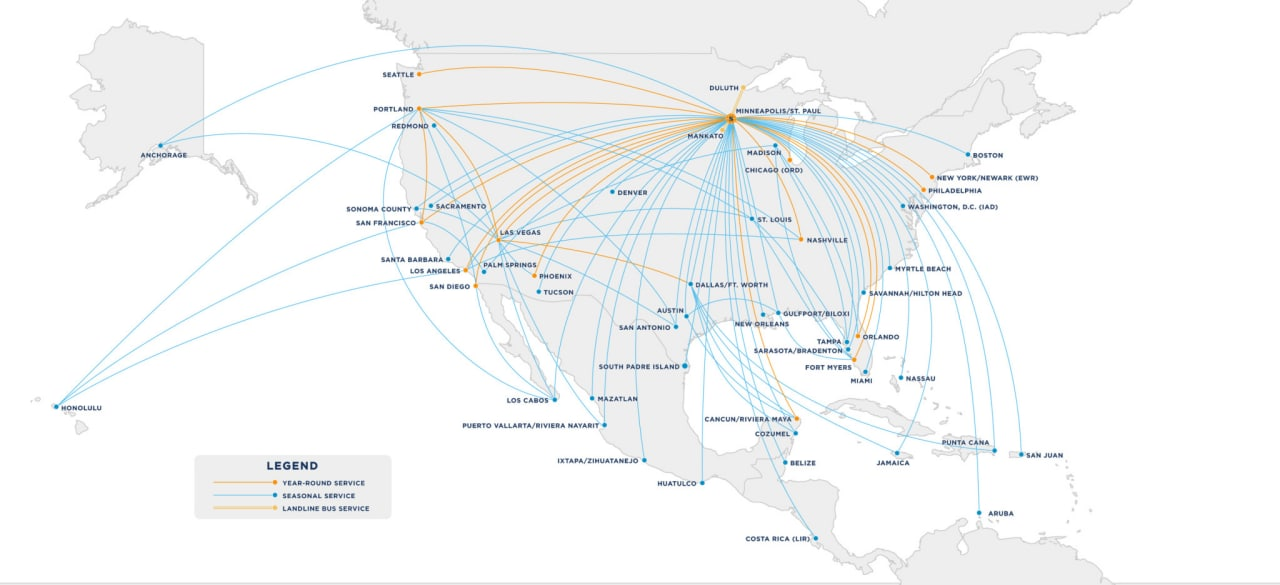